<a href="https://colab.research.google.com/github/raoojashwani/ML_Assignments/blob/main/5Credit_Card_Fraud_Detection_OjashwaniRao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

In [ ]:
# Load dataset
df = pd.read_csv("/content/creditcard.csv")

# Show first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape of dataset: (284807, 31)

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       

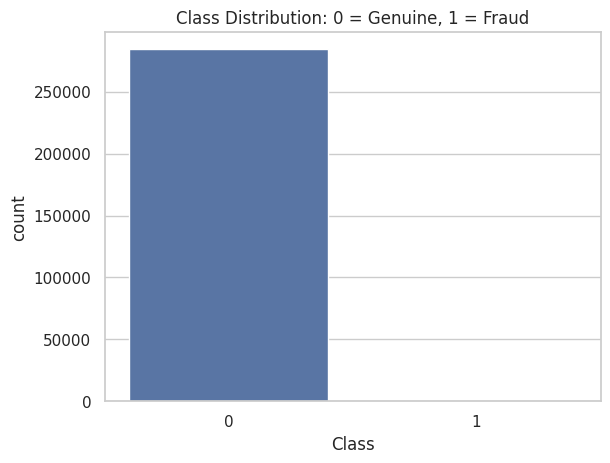

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: 0 = Genuine, 1 = Fraud')
plt.show()

In [ ]:
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize the 'Amount' column
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 227845
Testing samples: 56962


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # handles imbalance + more iterations
model.fit(X_train_scaled, y_train)

# Step 3: Predict on test set
y_pred = model.predict(X_test_scaled)

# Step 4: Print classification report
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



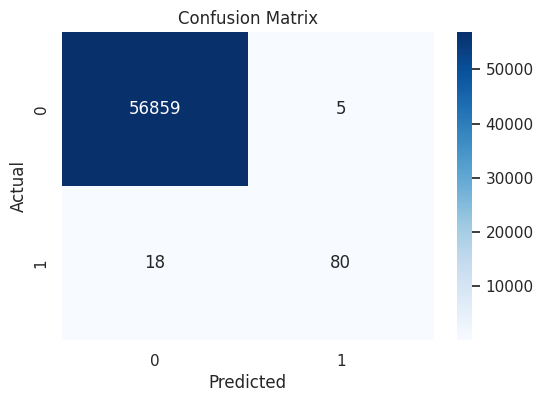

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data (make sure X and y are defined before this step)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[str(c) for c in rf.classes_],
    yticklabels=[str(c) for c in rf.classes_]
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in rf.classes_]))

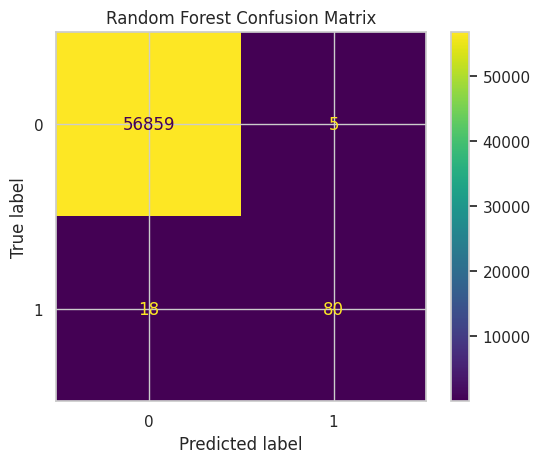

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the model if not done already
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

Model Classes: [0 1]


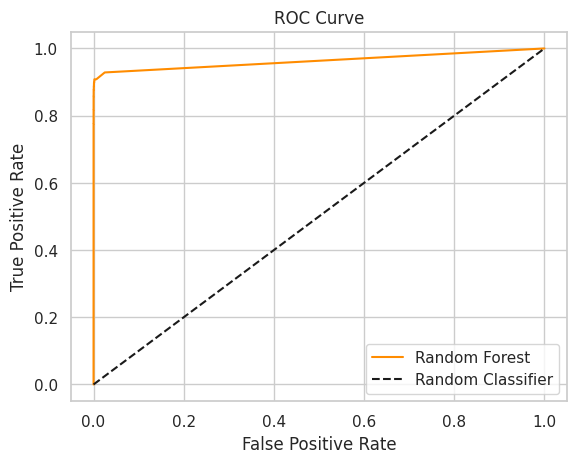

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Check class distribution (optional but useful for debugging)
print("Model Classes:", rf.classes_)  # Should show two classes, like [0, 1] or ['no', 'yes']

# Generate predicted probabilities for the positive class (usually class 1)
y_scores = rf.predict_proba(X_test)[:, 1]  # Index 1 for the positive class

# Calculate ROC Curve metrics
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Plot the ROC Curve
plt.plot(fpr, tpr, label='Random Forest', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<ipython-input-17-dc6e8ec5bdb0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances.head(10), palette='viridis')


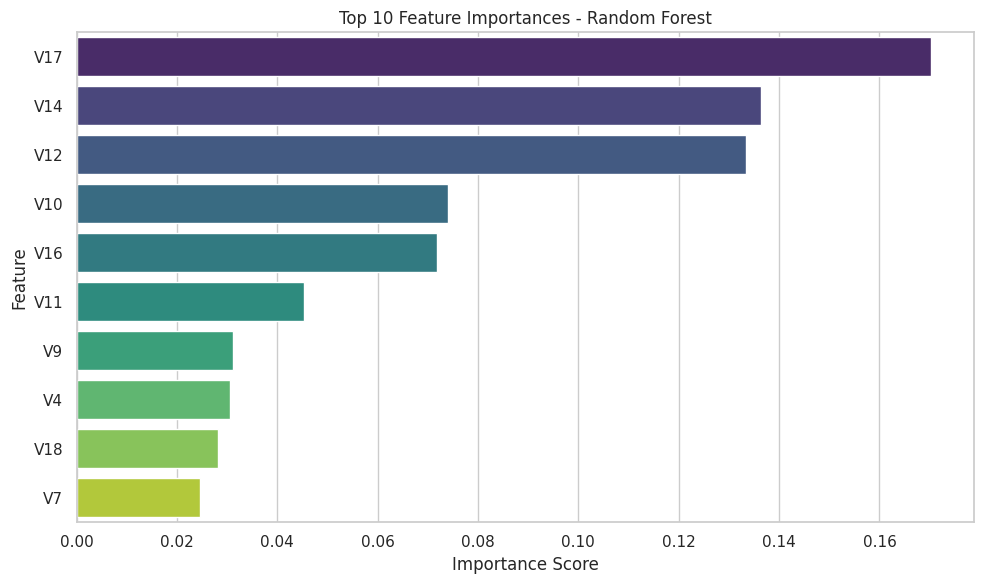

In [ ]:
import pandas as pd
import numpy as np

# Get feature importances
importances = rf.feature_importances_

# Get feature names (make sure you have them)
feature_names = X.columns

# Create a DataFrame
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Install imbalanced-learn if not installed
!pip install -U imbalanced-learn

# Import SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Show new class distribution
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_resampled.value_counts())

Before SMOTE:
 Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64
